In [2]:
import sys
sys.path.append('../src')

In [3]:
#Import the necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from logHelper import logger

In [ ]:
#Import the necessary modules for NLP
! pip install nltk
import nltk

Unable to create process using 'C:\Users\Kartheek Kotha\.conda\envs\nlp\python.exe "C:\Users\Kartheek Kotha\.conda\envs\nlp\Scripts\pip-script.py" install nltk'


In [ ]:
logger.info("Welcome to the custom Logging Page")

[2024-03-26 14:37:33,997: INFO: 2381599552: Welcome to the custom Logging Page]


During this exam, each test taker sees a Standardized Patient, a person trained to portray a clinical case. After interacting with the patient, the test taker documents the relevant facts of the encounter in a patient note. Each patient note is scored by a trained physician who looks for the presence of certain key concepts or features relevant to the case as described in a rubric. The goal of this competition is to develop an automated way of identifying the relevant features within each patient note, with a special focus on the patient history portions of the notes where the information from the interview with the standardized patient is documented.

Data Analysis
=============

In [ ]:
import pandas as pd
import numpy as np

[2024-03-26 14:37:35,070: INFO: utils: NumExpr defaulting to 8 threads.]



FEATURES
--------
143 rows<br>
3 columns:  
<ol>
 <li>feature_num : unique ID no. of each complaint/ observation, in increasing order, not continuous<br>143 unique vals</li>  
 <li>case_num : number of patients with that particular complaint/observation<br>10 unique vals</li>  
 <li>feature_text : complaint/observation - distinct<br>131 unique vals</li>
 </ol>

In [11]:

#extact data from the features.csv file into a pandas dataframe
features_df = pd.read_csv('../data/nbme-score-clinical-patient-notes/features.csv')

print(features_df.head(5))
print(features_df.columns)
print(len(features_df))


   feature_num  case_num                                       feature_text
0            0         0  Family-history-of-MI-OR-Family-history-of-myoc...
1            1         0                 Family-history-of-thyroid-disorder
2            2         0                                     Chest-pressure
3            3         0                              Intermittent-symptoms
4            4         0                                        Lightheaded
Index(['feature_num', 'case_num', 'feature_text'], dtype='object')
143


In [12]:
#unique values in each col of features.csv
for col in features_df.columns:
    print(col, features_df[col].nunique())

feature_num 143
case_num 10
feature_text 131



PATIENT NOTES
--------
42146 rows<br>
3 columns:  
<ol>
 <li>pn_num : unique ID no. of each patient, increasing order<br>42146 unique vals
 </li>  
 <li>case_num : **idk what this represents**<br>10 unique vals</li>  
 <li>pn_history : detailed description of complaints and observations. Most patients also have details of PMH, PSHH, FH, Social History, Medications, Sexual history, POS, Family history, Allergies. A patient has either all, or some of these details filled, under either acronyms or varying subheadings.<br>42146 unique vals</li>
 </ol>

In [13]:
patientnotes_df = pd.read_csv('../data/nbme-score-clinical-patient-notes/patient_notes.csv')
print(patientnotes_df.head(5))
print(patientnotes_df.columns)
print(len(patientnotes_df))


   pn_num  case_num                                         pn_history
0       0         0  17-year-old male, has come to the student heal...
1       1         0  17 yo male with recurrent palpitations for the...
2       2         0  Dillon Cleveland is a 17 y.o. male patient wit...
3       3         0  a 17 yo m c/o palpitation started 3 mos ago; \...
4       4         0  17yo male with no pmh here for evaluation of p...
Index(['pn_num', 'case_num', 'pn_history'], dtype='object')
42146


In [14]:
#unique values in each col of patient_notes.csv
for col in patientnotes_df.columns:
    print(col, patientnotes_df[col].nunique())

pn_num 42146
case_num 10
pn_history 42146


SAMPLE SUBMISSION
--------
5 rows<br>
2 columns:  
<ol>
 <li>id : submission number<br>5 unique vals
 </li>  
 <li>location : **idk what this represents**<br>3 unique vals, some NaN(blank) values</li>  

 </ol>

In [15]:
samplesub_df = pd.read_csv('../data/nbme-score-clinical-patient-notes/sample_submission.csv')
print(samplesub_df.head(5))
print(samplesub_df.columns)
print(len(samplesub_df))
for col in samplesub_df.columns:
    print(col, samplesub_df[col].nunique())

          id         location
0  00016_000            0 100
1  00016_001              NaN
2  00016_002  200 250;300 400
3  00016_003              NaN
4  00016_004           75 110
Index(['id', 'location'], dtype='object')
5
id 5
location 3


## Train and test

In [16]:
train_df = pd.read_csv('../data/nbme-score-clinical-patient-notes/train.csv')
print(train_df.head)

<bound method NDFrame.head of               id  case_num  pn_num  feature_num  \
0      00016_000         0      16            0   
1      00016_001         0      16            1   
2      00016_002         0      16            2   
3      00016_003         0      16            3   
4      00016_004         0      16            4   
...          ...       ...     ...          ...   
14295  95333_912         9   95333          912   
14296  95333_913         9   95333          913   
14297  95333_914         9   95333          914   
14298  95333_915         9   95333          915   
14299  95333_916         9   95333          916   

                                     annotation              location  
0              ['dad with recent heart attcak']           ['696 724']  
1                 ['mom with "thyroid disease']           ['668 693']  
2                            ['chest pressure']           ['203 217']  
3          ['intermittent episodes', 'episode']  ['70 91', '176 183']

In [17]:
print(train_df.columns)

Index(['id', 'case_num', 'pn_num', 'feature_num', 'annotation', 'location'], dtype='object')


In [18]:
print(len(train_df))
print(train_df.shape)

14300
(14300, 6)


In [19]:
train_df.head(1)

,id,case_num,pn_num,feature_num,annotation,location
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724']


In [20]:
test_df = pd.read_csv('../data/nbme-score-clinical-patient-notes/test.csv')
test_df.head(5)

,id,case_num,pn_num,feature_num
0,00016_000,0,16,0
1,00016_001,0,16,1
2,00016_002,0,16,2
3,00016_003,0,16,3
4,00016_004,0,16,4


In [21]:
test_df.columns

Index(['id', 'case_num', 'pn_num', 'feature_num'], dtype='object')

In [22]:
#get patient notes for a particular patient with pn_num = 16 m case_num = 1
print(patientnotes_df[(patientnotes_df['pn_num'] == 16) & (patientnotes_df['case_num'] == 0)]['pn_history'].values[0])

HPI: 17yo M presents with palpitations. Patient reports 3-4 months of intermittent episodes of "heart beating/pounding out of my chest." 2 days ago during a soccer game had an episode, but this time had chest pressure and felt as if he were going to pass out (did not lose conciousness). Of note patient endorses abusing adderall, primarily to study (1-3 times per week). Before recent soccer game, took adderrall night before and morning of game. Denies shortness of breath, diaphoresis, fevers, chills, headache, fatigue, changes in sleep, changes in vision/hearing, abdominal paun, changes in bowel or urinary habits. 
PMHx: none
Rx: uses friends adderrall
FHx: mom with "thyroid disease," dad with recent heart attcak
All: none
Immunizations: up to date
SHx: Freshmen in college. Endorses 3-4 drinks 3 nights / week (on weekends), denies tabacco, endorses trying marijuana. Sexually active with girlfriend x 1 year, uses condoms


In [23]:
print(features_df[(features_df['feature_num'] == 0) & (features_df['case_num'] == 0)]['feature_text'].values[0])

Family-history-of-MI-OR-Family-history-of-myocardial-infarction


### Data Analysis

   case_num  pn_history  percentage
3         3        9753   23.140986
5         5        6909   16.393015
4         4        5405   12.824467
9         9        5151   12.221800
8         8        4196    9.955868
7         7        4101    9.730461
0         0        2268    5.381294
2         2        1958    4.645755
6         6        1597    3.789209
1         1         808    1.917145


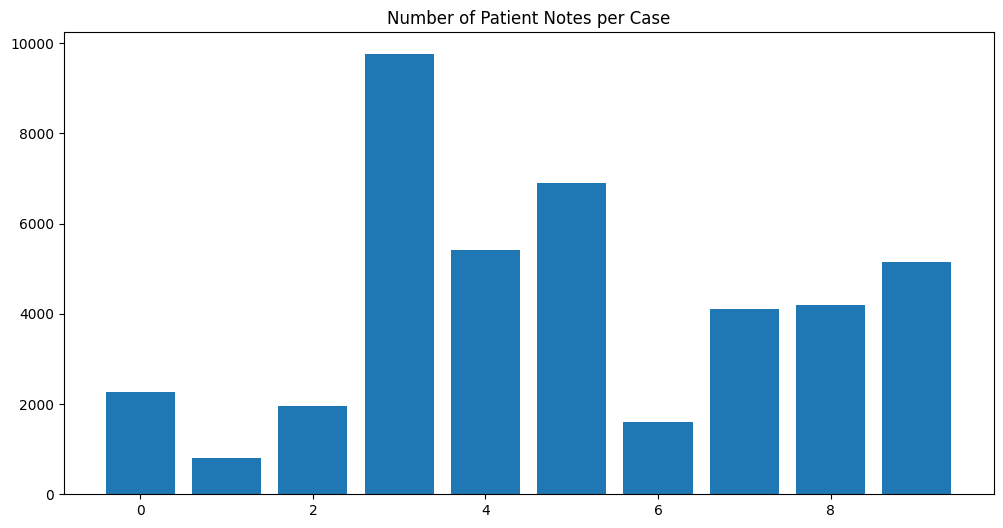

In [24]:
temp = patientnotes_df.groupby('case_num').count()['pn_history'].reset_index().sort_values(by='pn_history', ascending=False)
# temp.style.background_gradient(cmap='Purples')
sum_val = temp['pn_history'].sum()
temp['percentage'] = temp['pn_history'].apply(lambda x: x/sum_val*100)
print(temp)
plt.figure(figsize=(12,6))
plt.title('Number of Patient Notes per Case')
plt.bar(temp['case_num'], temp['pn_history'])
plt.show()

### Data Pre-processing

In [25]:
class PreProcess():
  def __init__(self ,df , columnName):
    self.df = df
    self.columnName = columnName
  # removing the URL's from the data
  def removeUrl(self):
    self.df[self.columnName] = self.df[self.columnName].str.replace(r'http\S+', '', regex=True)
  # removing the Special Charecters's from the data
  def removeSpecialChar(self):
    self.df[self.columnName] = self.df[self.columnName].str.replace(r'[^\w\s]', '', regex=True)
    self.df[self.columnName] = self.df[self.columnName].str.replace(r'\s+', ' ', regex=True)
  # removing the Numerica and Alpha Numerics from the data
  def removeNumeric_AlphaNumeric(self, removeNumeric = True , removeAlphaNumeric = True):
    if removeNumeric:
      self.df[self.columnName] = self.df[self.columnName].str.replace(r'\d+', '', regex=True)
    if removeAlphaNumeric:
      self.df[self.columnName] = self.df[self.columnName].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
  # Lower casing everything
  def lowerCase(self):
    self.df[self.columnName] = self.df[self.columnName].str.lower()
  # Adding all the pre-processing of the data into one fucntion
  def pre_process(self , removeLinks = True , removeSpec = True , removeNum = True, lowerCase = True):
    if removeLinks:
      self.removeUrl()
      print(f'After removing the URL\'s \n {self.df.head()}')
    if removeSpec:
      self.removeSpecialChar()
      print(f'After removing the Special charecters\'s \n {self.df.head()}')
    if removeNum:
      self.removeNumeric_AlphaNumeric(removeNumeric = True , removeAlphaNumeric = True)
      print(f'After removing the Numerics and Alphs-Numerics \n {self.df.head()}')
    if lowerCase:
      self.lowerCase()
      print(f'After Lower casing \n{self.df.head()}')
  # removing stop words
  def removeStopWords(self):
    nltk.download('stopwords')
    stop = stopwords.words('english')
    self.df[self.columnName] = self.df[self.columnName].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    print(f'After removing the stopWords\n {self.df.head()}')
  # tokenization using Glove using Pytorch
  def tokenization_glove(self): 
    global_vectors = GloVe(name='840B', dim=300)
    
  # lemmitization
  # stemming
  def get_df(self):
    return self.df